In the context of the Hugging Face library, a "Transformer" typically refers to a specific implementation or instantiation of the transformer architecture for natural language processing (NLP) tasks. Hugging Face provides a wide range of pre-trained transformer-based models and tools for working with them, making it easier for developers and researchers to use state-of-the-art NLP models in their applications.

The Hugging Face Transformers library provides implementations of various transformer architectures, including:

**BERT (Bidirectional Encoder Representations from Transformers)**: BERT is a transformer-based model introduced by Google in 2018. It is pre-trained on large corpora of text data using masked language modeling and next sentence prediction tasks. BERT has been highly successful in a wide range of NLP tasks, including text classification, question answering, and named entity recognition.

**GPT (Generative Pre-trained Transformer)**: GPT is a family of autoregressive transformer models developed by OpenAI. It generates text by predicting the next word in a sequence given the previous words. GPT models have been used for tasks such as text generation, summarization, and dialogue generation.

**RoBERTa (Robustly optimized BERT approach)**: RoBERTa is a variant of BERT introduced by Facebook AI. It is trained with larger batch sizes and longer sequences, along with other modifications to improve performance. RoBERTa has achieved state-of-the-art results on various NLP benchmarks.

**XLNet**: XLNet is a transformer-based model introduced by Google AI and CMU. It uses a permutation-based language modeling objective to capture bidirectional context and has achieved state-of-the-art results on several NLP tasks.

**DistilBERT**: DistilBERT is a smaller, distilled version of BERT developed by Hugging Face. It retains most of BERT's performance while being faster and more resource-efficient, making it suitable for deployment in resource-constrained environments.

These are just a few examples of transformer-based models available in the Hugging Face Transformers library. Each model comes with pre-trained weights that can be fine-tuned on domain-specific tasks using transfer learning, enabling developers to leverage powerful NLP capabilities with minimal effort. Additionally, Hugging Face provides various utilities and tools for working with these models, including tokenizers, pipelines, and model architectures, making it easier to integrate them into NLP applications.

**What is pipeline**

In the context of the Hugging Face Transformers library, a pipeline is a high-level abstraction that combines multiple steps of a natural language processing (NLP) task into a single object. Pipelines allow you to perform various NLP tasks, such as text classification, named entity recognition, question answering, translation, and more, with minimal setup and configuration.

In [ ]:
!pip install transformers

1. **Start by creating a pipeline() and specify the inference task:**

In [ ]:
from transformers import pipeline

transcriber = pipeline(task="automatic-speech-recognition")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are i

**2. Pass your input to the pipeline(). In the case of speech recognition, this is an audio input file:**

In [ ]:
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

{'text': 'I HAVE A DREAM BUT ONE DAY THIS NATION WILL RISE UP LIVE UP THE TRUE MEANING OF ITS TREES'}

**3.  Whisper large-v2 model from OpenAI.**

In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2")
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

config.json:   0%|          | 0.00/1.99k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.17G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/4.29k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/283k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.19k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

Due to a bug fix in https://github.com/huggingface/transformers/pull/28687 transcription using a multilingual Whisper will default to language detection followed by transcription instead of translation to English.This might be a breaking change for your use case. If you want to instead always translate your audio to English, make sure to pass `language='en'`.


{'text': ' I have a dream that one day this nation will rise up and live out the true meaning of its creed.'}

**4. If you have several inputs, you can pass your input as a list:**

In [ ]:
transcriber(
    [
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac",
        "https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/1.flac",
    ]
)

KeyboardInterrupt: 

**Parameters**

pipeline() supports many parameters; some are task specific, and some are general to all pipelines. In general, you can specify parameters anywhere you want:

**Device**
If you use device=n, the pipeline automatically puts the model on the specified device. This will work regardless of whether you are using PyTorch or Tensorflow.

In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", device=0)

If the model is too large for a single GPU and you are using PyTorch, you can set **device_map="auto**" to automatically determine how to load and store the model weights. Using the device_map argument requires the 🤗 Accelerate package:

In [ ]:
!pip install --upgrade accelerate

**The following code automatically loads and stores model weights across devices:**

In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", device_map="auto")

**Batch size**

By default, pipelines will not batch inference for reasons. The reason is that batching is not necessarily faster, and can actually be quite slower in some cases.

In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", device=0, batch_size=2)
audio_filenames = [f"https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/{i}.flac" for i in range(1, 5)]
texts = transcriber(audio_filenames)

**Task specific parameters**

In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", return_timestamps=True)
transcriber("https://huggingface.co/datasets/Narsil/asr_dummy/resolve/main/mlk.flac")

**return_timestamps=True** parameter in the provided code snippet enables the pipeline to return not only the transcribed text but also the timestamps corresponding to each word or token in the transcription.

**Sample Output**
{
    'text': 'I have a dream',
    
    'timestamps': [
        {'word': 'I', 'start': 0.00, 'end': 0.40},
        {'word': 'have', 'start': 0.40, 'end': 1.00},
        {'word': 'a', 'start': 1.00, 'end': 1.30},
        {'word': 'dream', 'start': 1.30, 'end': 2.00}
    ]
}

**chunk_length_s parameter** which is helpful for working on really long audio files (for example, subtitling entire movies or hour-long videos)

In [ ]:
transcriber = pipeline(model="openai/whisper-large-v2", chunk_length_s=30, return_timestamps=True)
transcriber("https://huggingface.co/datasets/sanchit-gandhi/librispeech_long/resolve/main/audio.wav")

**Vision pipeline**

In [ ]:
from transformers import pipeline

vision_classifier = pipeline(model="google/vit-base-patch16-224")
preds = vision_classifier(
    images="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds
[{'score': 0.4335, 'label': 'lynx, catamount'}, {'score': 0.0348, 'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}, {'score': 0.0324, 'label': 'snow leopard, ounce, Panthera uncia'}, {'score': 0.0239, 'label': 'Egyptian cat'}, {'score': 0.0229, 'label': 'tiger cat'}]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

[{'score': 0.4335, 'label': 'lynx, catamount'},
 {'score': 0.0348,
  'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'},
 {'score': 0.0324, 'label': 'snow leopard, ounce, Panthera uncia'},
 {'score': 0.0239, 'label': 'Egyptian cat'},
 {'score': 0.0229, 'label': 'tiger cat'}]

**Text pipeline**

Using a pipeline() for NLP tasks is practically identical.

In [ ]:
from transformers import pipeline

# This model is a `zero-shot-classification` model.
# It will classify text, except you are free to choose any label you might imagine
classifier = pipeline(model="facebook/bart-large-mnli")
classifier(
    "I have a problem with my iphone that needs to be resolved asap!!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5036349892616272,
  0.47880035638809204,
  0.012600057758390903,
  0.002655790187418461,
  0.002308750059455633]}

**Multimodal pipeline**

The pipeline() supports more than one modality.
 For example, a **visual question answering (VQA)** task combines text and image. Feel free to use any image link you like and a question you want to ask about the image. The image can be a URL or a local path to the image.

For example, if you use this invoice image:

[{'score': 0.42515, 'answer': 'us-001', 'start': 16, 'end': 16}]

In [ ]:
!pip install pytesseract

In [ ]:
from transformers import pipeline

vqa = pipeline(model="impira/layoutlm-document-qa")
vqa(
    image="https://huggingface.co/spaces/impira/docquery/resolve/2359223c1837a7587402bda0f2643382a6eefeab/invoice.png",
    question="What is the invoice number?",
)

# **Using pipeline on large models with 🤗 accelerate :**

You can easily run pipeline on large models using 🤗 accelerate! First make sure you have installed accelerate with

**pip install accelerate.**

In [ ]:
# pip install accelerate
import torch
from transformers import pipeline

pipe = pipeline(model="facebook/opt-1.3b", torch_dtype=torch.bfloat16, device_map="auto")
output = pipe("This is a cool example!", do_sample=True, top_p=0.95)

# **Creating web demos from pipelines with gradio**

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.9 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=

**Pipelines are automatically supported in Gradio, a library that makes creating beautiful and user-friendly machine learning apps on the web a breeze. First, make sure you have Gradio installed:**

create a web demo around an image classification pipeline (or any other pipeline) in a single line of code by calling **Gradio’s Interface.from_pipeline** function to launch the pipeline. This creates an intuitive drag-and-drop interface in your browser:

In [ ]:
from transformers import pipeline
import gradio as gr

pipe = pipeline("image-classification", model="google/vit-base-patch16-224")

gr.Interface.from_pipeline(pipe).launch()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://2716f4870e27591527.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


the web demo runs on a local server. If you’d like to share it with others, you can generate a temporary public link by setting **share=True** in launch().

In [ ]:
from transformers import pipeline
import gradio as gr

pipe = pipeline("image-classification", model="google/vit-base-patch16-224")

gr.Interface.from_pipeline(pipe).launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://1784cffd2adae8d45e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# 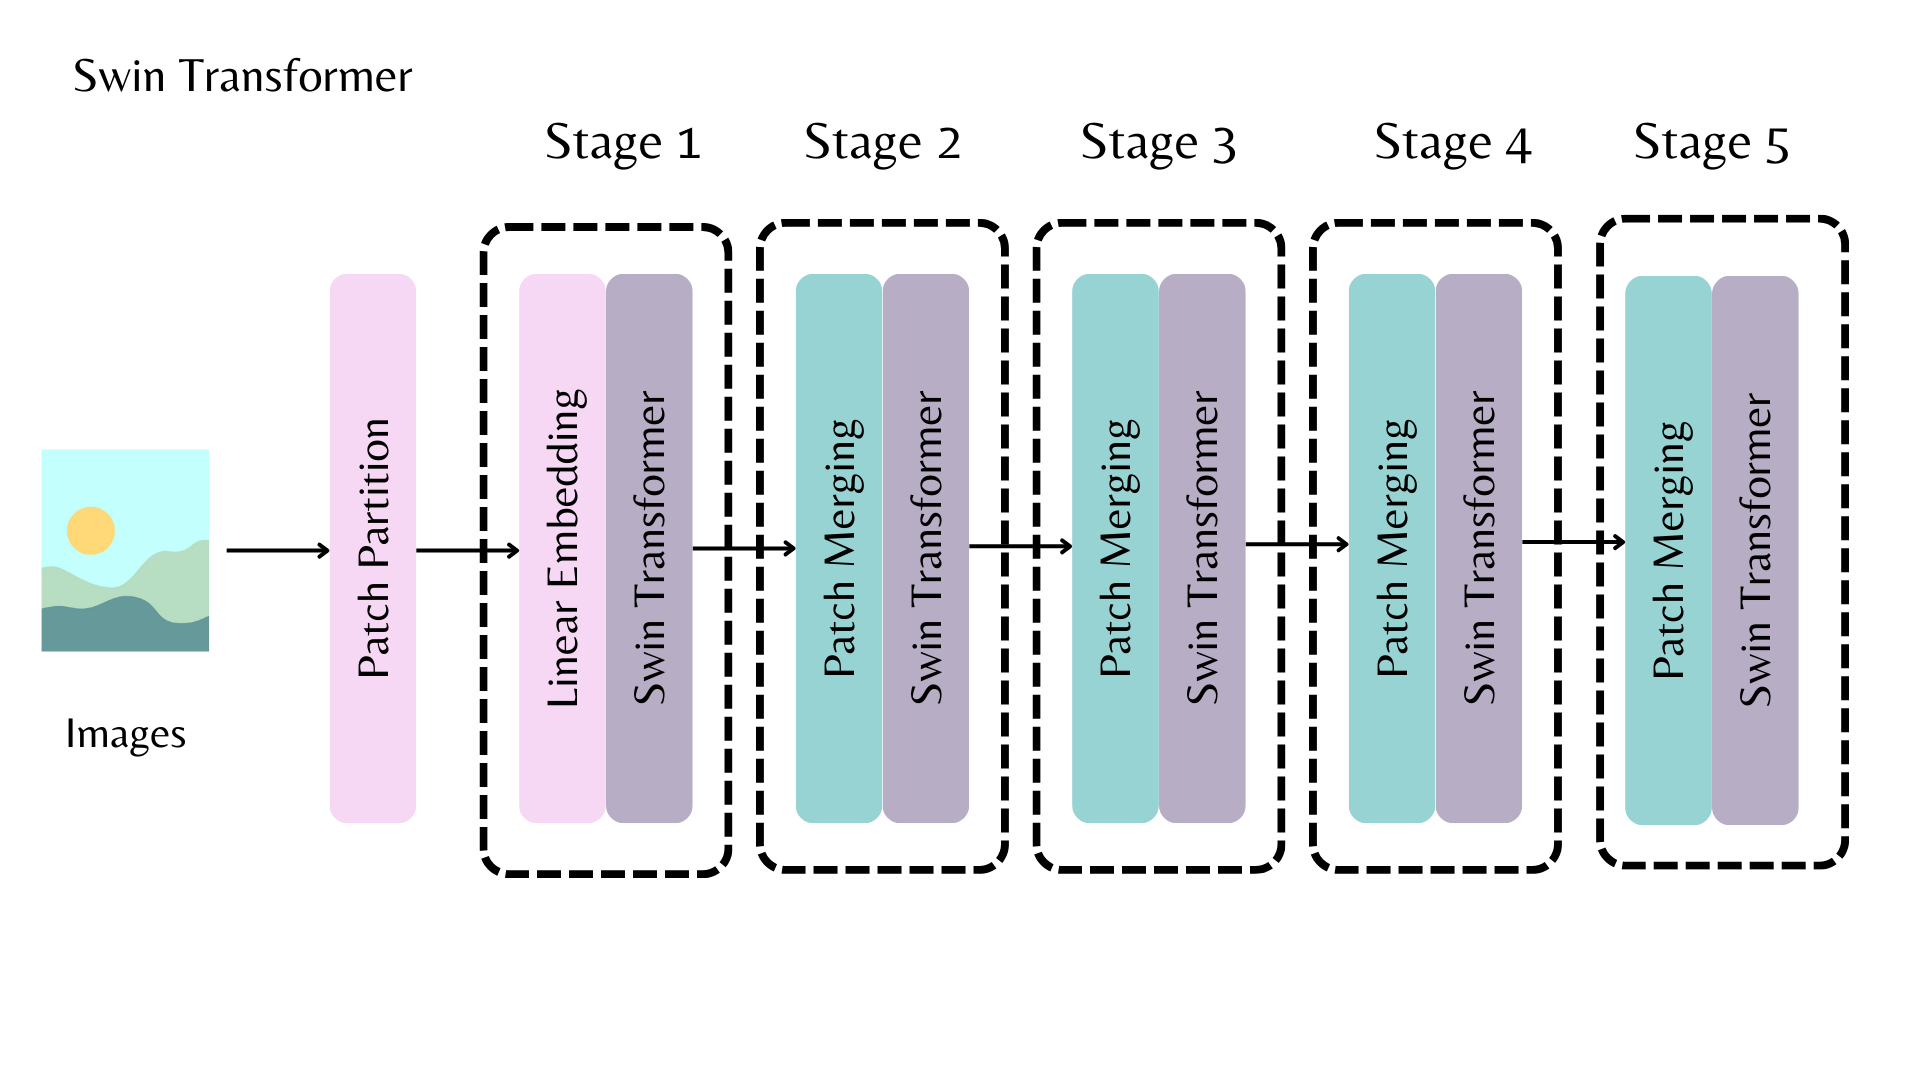**Load pretrained instances with an AutoClass**

The **from_pretrained(**) method lets you quickly load a pretrained model for any architecture so you don’t have to devote time and resources to train a model from scratch.

Producing this type of checkpoint-agnostic code means if your code works for one checkpoint, it will work with another checkpoint - as long as it was trained for a similar task - even if the architecture is different.

**AutoTokenizer**

Nearly every NLP task begins with a tokenizer. A tokenizer converts your input into a format that can be processed by the model.

Load a tokenizer with **AutoTokenizer.from_pretrained()**:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

 **tokenize your input as shown below:**

In [ ]:
sequence = "In a hole in the ground there lived a hobbit."
print(tokenizer(sequence))

{'input_ids': [101, 1999, 1037, 4920, 1999, 1996, 2598, 2045, 2973, 1037, 7570, 10322, 4183, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


**Sequence: "In a hole in the ground there lived a hobbit."**

Output:

**input_ids:**

101: [CLS] - Special token indicating the start of the sequence.

1999: In

1037: a

4920: hole

1999: In

1996: the

2598: ground

2045: there

2973: lived

1037: a

7570: hobbit

10322: .

4183: [SEP] - Special token indicating the end of the sequence.

1012: [SEP] - Special token indicating the end of the sequence.
token_type_ids:

All tokens belong to the same segment, so all token type IDs are 0.

**attention_mask:**

All tokens should be attended to, so all values are 1.

**AutoImageProcessor**

For vision tasks, an image processor processes the image into the correct input format.

In [ ]:
from transformers import AutoImageProcessor

image_processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

**AutoBackbone**

The AutoBackbone lets you use pretrained models as backbones to get feature maps from different stages of the backbone. You should specify one of the following parameters in from_pretrained():

**out_indices** is the index of the layer you’d like to get the feature map from

**out_features** is the name of the layer you’d like to get the feature map from

In [4]:
from transformers import AutoImageProcessor, AutoBackbone
import torch
from PIL import Image
import requests
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = AutoBackbone.from_pretrained("microsoft/swin-tiny-patch4-window7-224", out_indices=(1,))

inputs = processor(image, return_tensors="pt")
outputs = model(**inputs)
feature_maps = outputs.feature_maps

preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


config.json:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

Some weights of SwinBackbone were not initialized from the model checkpoint at microsoft/swin-tiny-patch4-window7-224 and are newly initialized: ['swin.hidden_states_norms.stage1.bias', 'swin.hidden_states_norms.stage1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**feature_maps object from the first stage of the backbone:**

In [6]:
list(feature_maps[0].shape)


[1, 96, 56, 56]

In a Swin Transformer model with four stages, each stage plays a specific role in extracting features from an image:

**Stage 1: Low-Level Feature Extraction**

*Function: Focuses on capturing fundamental image details like edges, colors, and basic textures.*

Output: Feature maps representing these low-level visual patterns. These maps might have higher spatial resolution (more detailed representation of the image's location information) compared to later stages.

**Stage 2 & 3: Mid-Level Feature Extraction**

Function: Builds upon the low-level features from Stage 1. Here, the model starts to combine those basic elements and learn more complex representations. This might involve identifying simple shapes, local object parts, or rudimentary textures.

Output: Feature maps become progressively more abstract, capturing a blend of low-level and some higher-level features. Spatial resolution might decrease slightly compared to Stage 1.


**Stage 4: High-Level Feature Extraction**

Function: Focuses on extracting semantic information, representing the overall meaning or content of the image. This stage learns to identify objects, their relationships, and potentially even some actions taking place in the image.
Output: Feature maps have the highest level of abstraction. They might have lower spatial resolution compared to earlier stages, sacrificing some location details in favor of capturing the global meaning.



**Understanding Feature Maps Across Stages:**

**Imagine a picture of a cat sitting on a chair.**

**Stage 1** features might represent edges of the cat's fur, lines of the chair's legs, and color blobs for different regions.

**Stage 2 & 3** features could start to show interconnected edges forming cat shapes, textured regions for the chair's surface, and potential connections between the cat and chair.

**Stage 4 features** would likely capture the overall concept of a cat sitting on a chair, potentially distinguishing the cat from the background.


**Choosing Output Stage:**

The optimal stage for your application depends on the desired level of detail.

For tasks like object detection that require identifying specific objects and their positions, features from Stage 3 or 4 might be suitable.

For image classification, where the overall content is more important than precise location details, Stage 4 features might be sufficient.

**AutoFeatureExtractor**

For audio tasks, a feature extractor processes the audio signal the correct input format.

Load a feature extractor with **AutoFeatureExtractor.from_pretrained():**

In [7]:
from transformers import AutoFeatureExtractor

feature_extractor = AutoFeatureExtractor.from_pretrained(
    "ehcalabres/wav2vec2-lg-xlsr-en-speech-emotion-recognition"
)

preprocessor_config.json:   0%|          | 0.00/214 [00:00<?, ?B/s]

**AutoProcessor**

Multimodal tasks require a processor that combines two types of preprocessing tools.

 For example, the LayoutLMV2 model requires an image processor to handle images and a tokenizer to handle text; a processor combines both of them.

Load a processor with **AutoProcessor.from_pretrained():**

In [8]:
from transformers import AutoProcessor

processor = AutoProcessor.from_pretrained("microsoft/layoutlmv2-base-uncased")

preprocessor_config.json:   0%|          | 0.00/135 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

**AutoModel**

**Pytorch**

The AutoModelFor classes let you load a pretrained model for a given task.

For example, load a model for sequence classification with **AutoModelForSequenceClassification.from_pretrained():**

In [9]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased")

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Easily reuse the same checkpoint to load an architecture for a different task**:

In [10]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained("distilbert/distilbert-base-uncased")

Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Sequence classification** is a type of natural language processing (NLP) task where the goal is to classify a sequence of tokens (usually words or subwords) into one or more predefined categories or classes.

Sequence classification tasks can also involve more than two classes.
For example:

**Task: Topic Classification**

Description: Given a news article or a document, classify it into one of several predefined topics or categories.

**Example:**

Input: "New scientific breakthroughs in cancer research"

Output: Health/Medicine

Input: "Latest developments in artificial intelligence and machine learning"

Output: Technology

**Tensorflow**

 load a model for sequence classification with **TFAutoModelForSequenceClassification.from_pretrained():**

In [11]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("distilbert/distilbert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [12]:
from transformers import TFAutoModelForTokenClassification

model = TFAutoModelForTokenClassification.from_pretrained("distilbert/distilbert-base-uncased")

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForTokenClassification: ['vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_layer_norm.bias']
- This IS expected if you are initializing TFDistilBertForTokenClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForTokenClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able t

**Generally, we recommend using the AutoTokenizer class and the TFAutoModelFor class to load pretrained instances of models.**